# Homework Assignment 3
## Deterministic Chaos in the Lorenz Equations
### Samira Khan

### Part 1: Solution to the Lorenz equations in the non-chaotic regime

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin
from scipy.integrate import odeint 

###### A. (30 pts) Write a program that solves the Lorenz equations for these values of the parameters in the range t = 0 to t = 50 with initial conditions (x, y, z) = (0,1,0). Keep in mind that these are coupled equations. Define a function that calculates the three derivatives. Be sure to include comments.

In [2]:
def fd(vec,t):
    """ Computes dx/dt,dy/dt,dz/dt"""
    sigma = 10 
    rho = 13 
    beta = 8/3
    x,y,z = vec # unpack vector into the three dependent variables
    dxdt = sigma*(y-x) # equation for dx/dt
    dydt = (rho*x)-y-(x*z) # equation for dy/dt
    dzdt = (x*y)-(beta*z)# equation for dz/dt
    return dxdt,dydt,dzdt # pack derivatives into vector and return

tmax = 50 
nsteps =10000
t= np.linspace(0,tmax,nsteps) # times for simulation
x0 = 0.0
y0 = 1.0 
z0 = 0.0 # initial condition
xyz = odeint(fd,(x0,y0,z0),t) # integrate using odeint, with initial conditions provided as a tuple

###### B. (10 pts) Have your program make a plot of y as a function of time. Include a title and axis labels

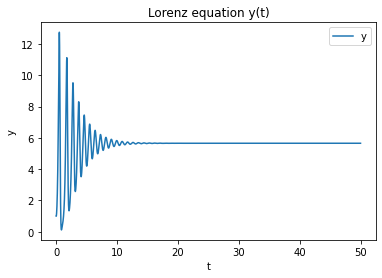

In [3]:
plt.plot(t,xyz[:,1],label='y') # plot first column of solution which is y(t)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title("Lorenz equation y(t)")
plt.show()

###### C. (5 pts) Your plot of y(t) should look familiar, like something you have seen before. What behavior does the Lorenz system exhibit in this regime of its parameters? Respond in a Markdown cell in your Jupyter notebook.

When $\rho$ is 28 only then the Lorenz system has a chaotic solution but here $\rho$ < 28 which is why the parameter values can generate other types of solutions. The region 13.926 < $\rho$ < 24.06 is referred to as transient chaos region. Transient chaos is a characteristic behaviour in nonlinear dynamics where trajectories in a certain region of phase space behave chaotically for a while, before escaping to an external attractor. Here we can see how it was chaotic at one part and then slowly it came to a linear position.

### Part 2. Solution to the Lorenz equations in the chaotic regime

###### A. (10 pts) Solve the Lorenz equations for this case in the range t = 0 to t = 50 with initial conditions (x, y, z) = (0,1,0). Have your program make a plot of y as a function of time. You should find that the simple behavior found in Part 1 has been replaced by apparently random, unpredictable motion.


In [4]:
def fd(vec,t):
    """ Computes dx/dt,dy/dt,dz/dt"""
    sigma = 10 
    rho = 28 
    beta = 8/3
    x,y,z = vec # unpack vector into the three dependent variables
    dxdt = sigma*(y-x)
    dydt = (rho*x)-y-(x*z)
    dzdt = (x*y)-(beta*z)
    return dxdt,dydt,dzdt # pack derivatives into vector and return

tmax = 50 
nsteps =10000
t= np.linspace(0,tmax,nsteps) # times for simulation
x0 = 0.0
y0 = 1.0 
z0 = 0.0 # initial condition
xyz = odeint(fd,(x0,y0,z0),t) # integrate using odeint, with initial conditions provided as a tuple

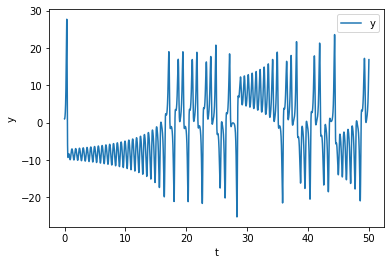

In [5]:
plt.plot(t,xyz[:,1],label='y') # plot first column of solution which is y(t)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

###### B. (5 pts) Vary the size of your timestep Dt (i.e. the number of timesteps your ODE solver integrates over.) What happens to the plot when you make the timestep smaller/increase the number of steps?

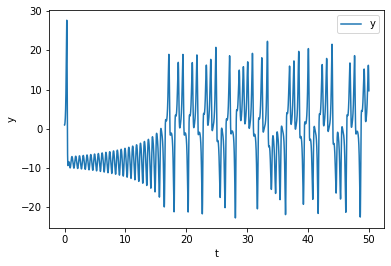

In [6]:
nsteps = 50000
t= np.linspace(0,tmax,nsteps)
xyz = odeint(fd,(x0,y0,z0),t)
plt.plot(t,xyz[:,1],label='y') # plot first column of solution which is y(t)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Now $\rho$ is 28 and therefor the the Lorenz system has a chaotic solution. Therefore as I increase the number of steps it becomes more chaotic.

###### C. (10 pts) Make a second plot of y as a function of time, on top of the plot from part (A), this one starting with a very slightly different initial condition: (x, y, z) = (0,1 + 10!", 0). Make sure the two plots are colored differently. Include a title, axis labels, and a legend with your graph

In [7]:
tmax = 50 
nsteps = 10000
t= np.linspace(0,tmax,nsteps) # times for simulation
x0 = 0.0
y0 = 1.0 + 10**(-9)
z0 = 0.0 # initial condition
xyz1 = odeint(fd,(x0,y0,z0),t) # integrate using odeint, with initial conditions provided as a tuple
x0 = 0.0
y0 = 1.0 
z0 = 0.0 # initial condition
xyz = odeint(fd,(x0,y0,z0),t)

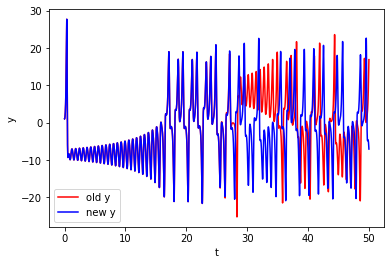

In [8]:
plt.plot(t,xyz[:,1],color="red",label='old y')# plot first column of solution which is y(t)
plt.plot(t,xyz1[:,1],color="blue",label='new y')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

###### D. (10 pts) At what time do the plots begin to deviate? Does this deviation point depend on the size of your timestep? Justify your answer in a comment in a markdown cell.

In [9]:
tmax = 50 
nsteps = 50000
t= np.linspace(0,tmax,nsteps) # times for simulation
x0 = 0.0
y0 = 1.0 + 10**(-9)
z0 = 0.0 # initial condition
xyz1 = odeint(fd,(x0,y0,z0),t) # integrate using odeint, with initial conditions provided as a tuple
x0 = 0.0
y0 = 1.0 
z0 = 0.0 # initial condition
xyz = odeint(fd,(x0,y0,z0),t)

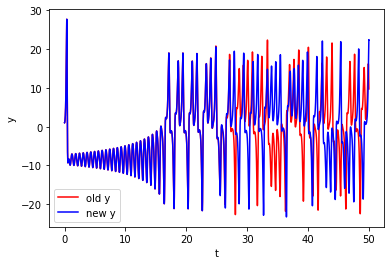

In [10]:
plt.plot(t,xyz[:,1],color="red",label='old y')# plot first column of solution which is y(t)
plt.plot(t,xyz1[:,1],color="blue",label='new y')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

After t= 30 you can see that the plot starts deviating and it seems like even if we change the number of steps the deviation point doesn't change, it remains the same.

### Part 3. 2 and 3D plots of the Lorenz strange attractor 

######  A. (10 pts) Using your solution for x(t), y(t), and z(t) from Part 2 (with the initial condition (0,1,0)), make a plot of y vs x to produce a two dimensional image of the strange attractor. Use a small enough timestep to make it look smooth. Include axis labels. Try plotting x vs z instead – do you see a difference?


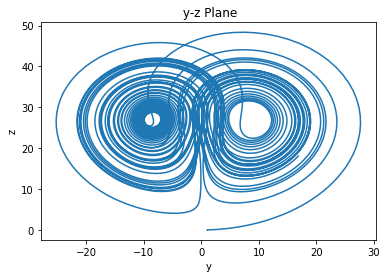

In [11]:
tmax = 50 
nsteps =10000
t= np.linspace(0,tmax,nsteps) # times for simulation
x0 = 0.0
y0 = 1.0 
z0 = 0.0 # initial condition
xyz = odeint(fd,(x0,y0,z0),t)
X = xyz[:,0]
Y = xyz[:,1]
Z = xyz[:,2]
plt.plot(Y,Z) 
plt.xlabel('y')
plt.ylabel('z')
plt.title(" y-z Plane")
plt.show()

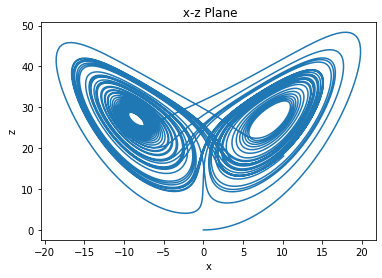

In [12]:
plt.plot(X,Z)
plt.xlabel('x')
plt.ylabel('z')
plt.title(" x-z Plane")
plt.show()

I do see a difference in each plane.

######  B. (10 pts) Now do a 3D scatter plot of x(t), y(t), z(t) on x,y,z axes to show the full trajectory. For this, look up 3D surface and scatter plots in the course handout “Getting starting with plotting and graphics”. If you do this in Spyder and allow the plot to pop out (%matplotlib), you should be able to spin the plot around with your mouse and see the Lorenz attractor from various angles. It even looks like a butterfly! Note too that the trajectory never repeats itself – this is the essence of a chaotic orbit.

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

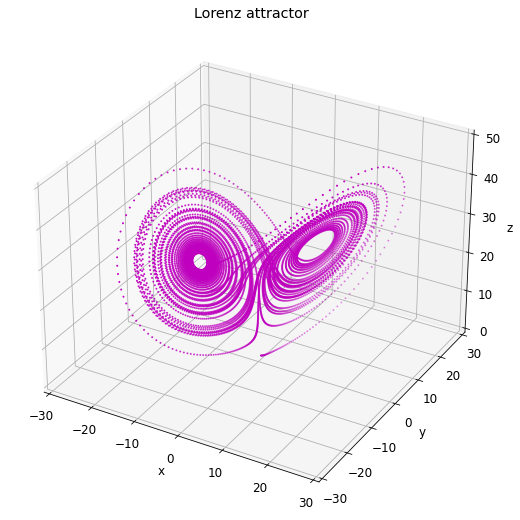

In [14]:
X = xyz[:,0]
Y = xyz[:,1]
Z = xyz[:,2]
fig = plt.figure(figsize=(12,9)) # call the figure fig
plt.rc('font', size=12)
ax = fig.add_subplot(projection='3d') # get some 3D axes
ax.scatter(X,Y,Z,s=1,c='m') # the scatter plot
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim((-30,30))
ax.set_ylim((-30,30))
ax.set_zlim((0,50))
plt.title ('Lorenz attractor')
plt.show()

In [15]:
%matplotlib qt

In [16]:
X = xyz[:,0]
Y = xyz[:,1]
Z = xyz[:,2]
fig = plt.figure(figsize=(12,9)) # call the figure fig
plt.rc('font', size=12)
ax = fig.add_subplot(projection='3d') # get some 3D axes
ax.scatter(X,Y,Z,s=1,c='m') # the scatter plot
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim((-30,30))
ax.set_ylim((-30,30))
ax.set_zlim((0,50))
plt.title ('Lorenz attractor')
plt.show()